In [13]:
# Import necessary Libraries
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning)

import numpy as np
np.seterr(divide='ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [14]:
lcv_ds = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\LCV_input_2023.xlsx")

In [15]:
lcv_ds.head()

,Date,LCV Sales,FoodAGRO,Food products,Consumer goods,"Cosmetics, toiletries, soaps & detergents",Electronics,Wholesale & retail trading(mil),Wholesale trading(mil),Retail trading(mil),...,Growth YoY%,GVA Gross Value Add,GVA Agriculture,Mining,GVA_Manu,Electricity,GVA_Cons,Trade,Real estate,Social and personal services
0,2011-07-01,42281,21727.866667,17298.166667,20562.266667,4007.833333,1229.1,274024,197985,20086,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
1,2011-08-01,41441,21727.866667,17298.166667,20562.266667,4007.833333,1229.1,274024,197985,20086,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
2,2011-09-01,46422,21727.866667,17298.166667,20562.266667,4007.833333,1229.1,274024,197985,20086,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
3,2011-10-01,38922,21345.366667,17771.033333,19766.666667,3958.400000,1454.9,300989,215812,20882,...,6.18,6.912985e+06,1.669885e+06,216162.633333,1.112248e+06,155409.833333,630319.266667,1.163190e+06,1.134477e+06,809198.900000
4,2011-11-01,45274,21345.366667,17771.033333,19766.666667,3958.400000,1454.9,300989,215812,20882,...,6.18,6.912985e+06,1.669885e+06,216162.633333,1.112248e+06,155409.833333,630319.266667,1.163190e+06,1.134477e+06,809198.900000


In [16]:
lcv_ds.set_index("Date",inplace=True)

In [17]:
lcv_ds.head()

,LCV Sales,FoodAGRO,Food products,Consumer goods,"Cosmetics, toiletries, soaps & detergents",Electronics,Wholesale & retail trading(mil),Wholesale trading(mil),Retail trading(mil),M1,...,Growth YoY%,GVA Gross Value Add,GVA Agriculture,Mining,GVA_Manu,Electricity,GVA_Cons,Trade,Real estate,Social and personal services
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-01,42281,21727.866667,17298.166667,20562.266667,4007.833333,1229.1,274024,197985,20086,15817.0,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
2011-08-01,41441,21727.866667,17298.166667,20562.266667,4007.833333,1229.1,274024,197985,20086,15843.0,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
2011-09-01,46422,21727.866667,17298.166667,20562.266667,4007.833333,1229.1,274024,197985,20086,15828.0,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
2011-10-01,38922,21345.366667,17771.033333,19766.666667,3958.400000,1454.9,300989,215812,20882,15995.0,...,6.18,6.912985e+06,1.669885e+06,216162.633333,1.112248e+06,155409.833333,630319.266667,1.163190e+06,1.134477e+06,809198.900000
2011-11-01,45274,21345.366667,17771.033333,19766.666667,3958.400000,1454.9,300989,215812,20882,16152.0,...,6.18,6.912985e+06,1.669885e+06,216162.633333,1.112248e+06,155409.833333,630319.266667,1.163190e+06,1.134477e+06,809198.900000


In [18]:
lcv_ds.describe()

,LCV Sales,FoodAGRO,Food products,Consumer goods,"Cosmetics, toiletries, soaps & detergents",Electronics,Wholesale & retail trading(mil),Wholesale trading(mil),Retail trading(mil),M1,...,Growth YoY%,GVA Gross Value Add,GVA Agriculture,Mining,GVA_Manu,Electricity,GVA_Cons,Trade,Real estate,Social and personal services
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02
mean,44230.007246,15168.214493,10590.372464,17709.079372,5717.000725,1703.158696,333768.152174,185978.543478,48646.956522,30552.672717,...,5.271932,1.066645e+07,1.793934e+06,287429.436232,1.789898e+06,262009.567391,9.794454e+05,1.910599e+06,2.313842e+06,1.441750e+06
std,10553.705452,5720.088241,5092.507315,4180.283431,1540.503980,1609.053488,117278.579581,75784.339575,21810.630156,11697.053552,...,5.820988,3.787851e+06,8.164108e+05,88925.298114,5.296924e+05,126797.873233,2.888863e+05,6.394495e+05,9.149918e+05,6.370370e+05
min,138.000000,7929.000000,3930.766667,4435.870000,3958.400000,325.366667,183131.000000,89455.000000,20086.000000,15817.000000,...,-29.290000,6.377357e+06,8.969137e+05,185394.133333,1.110348e+06,154886.833333,5.835635e+05,1.114280e+06,1.134477e+06,8.091989e+05
25%,38171.750000,10438.333333,6449.100000,15083.433333,4530.600000,558.666667,269094.000000,147332.000000,27706.000000,20984.500000,...,5.223333,7.923846e+06,1.225861e+06,227553.691667,1.329344e+06,173488.266667,7.722997e+05,1.423721e+06,1.649609e+06,9.729866e+05
50%,45217.500000,13473.983333,9386.966667,18460.850000,5221.700000,890.583333,295648.000000,166365.500000,44431.500000,26860.500000,...,6.245000,9.562608e+06,1.525140e+06,265119.133333,1.706816e+06,215828.433333,9.066856e+05,1.816075e+06,2.021243e+06,1.216325e+06
75%,50850.000000,19247.133333,13547.233333,20379.000000,6812.500000,2513.077778,342077.000000,194972.000000,66021.000000,38533.600875,...,7.590000,1.106073e+07,1.962265e+06,318831.566667,2.005124e+06,263879.716667,1.158005e+06,2.119079e+06,2.710084e+06,1.600357e+06
max,72142.000000,29899.800000,24821.366667,26873.700000,9298.000000,6231.000000,749454.000000,497911.000000,92687.000000,55271.000000,...,10.786667,1.998879e+07,4.313515e+06,580850.500000,3.110668e+06,625937.600000,1.891312e+06,3.810171e+06,4.836027e+06,3.010941e+06


In [19]:
lcv_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 2011-07-01 to 2022-12-01
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LCV Sales                                  138 non-null    int64  
 1   FoodAGRO                                   138 non-null    float64
 2   Food products                              138 non-null    float64
 3   Consumer goods                             138 non-null    float64
 4   Cosmetics, toiletries, soaps & detergents  138 non-null    float64
 5   Electronics                                138 non-null    float64
 6   Wholesale & retail trading(mil)            138 non-null    int64  
 7   Wholesale trading(mil)                     138 non-null    int64  
 8   Retail trading(mil)                        138 non-null    int64  
 9   M1                                         138 non-null    float64
 10  M3     

In [20]:
lcv_ds.shape

(138, 40)

In [21]:
lcv_ds.isnull().sum()

LCV Sales                                    0
FoodAGRO                                     0
Food products                                0
Consumer goods                               0
Cosmetics, toiletries, soaps & detergents    0
Electronics                                  0
Wholesale & retail trading(mil)              0
Wholesale trading(mil)                       0
Retail trading(mil)                          0
M1                                           0
M3                                           0
BEI                                          0
IIP                                          0
PMI                                          0
CC                                           0
WPI                                          0
CMR                                          0
Vloans                                       0
E-comm                                       0
Retail Sales                                 0
Credit_CS                                    0
Ind_freight  

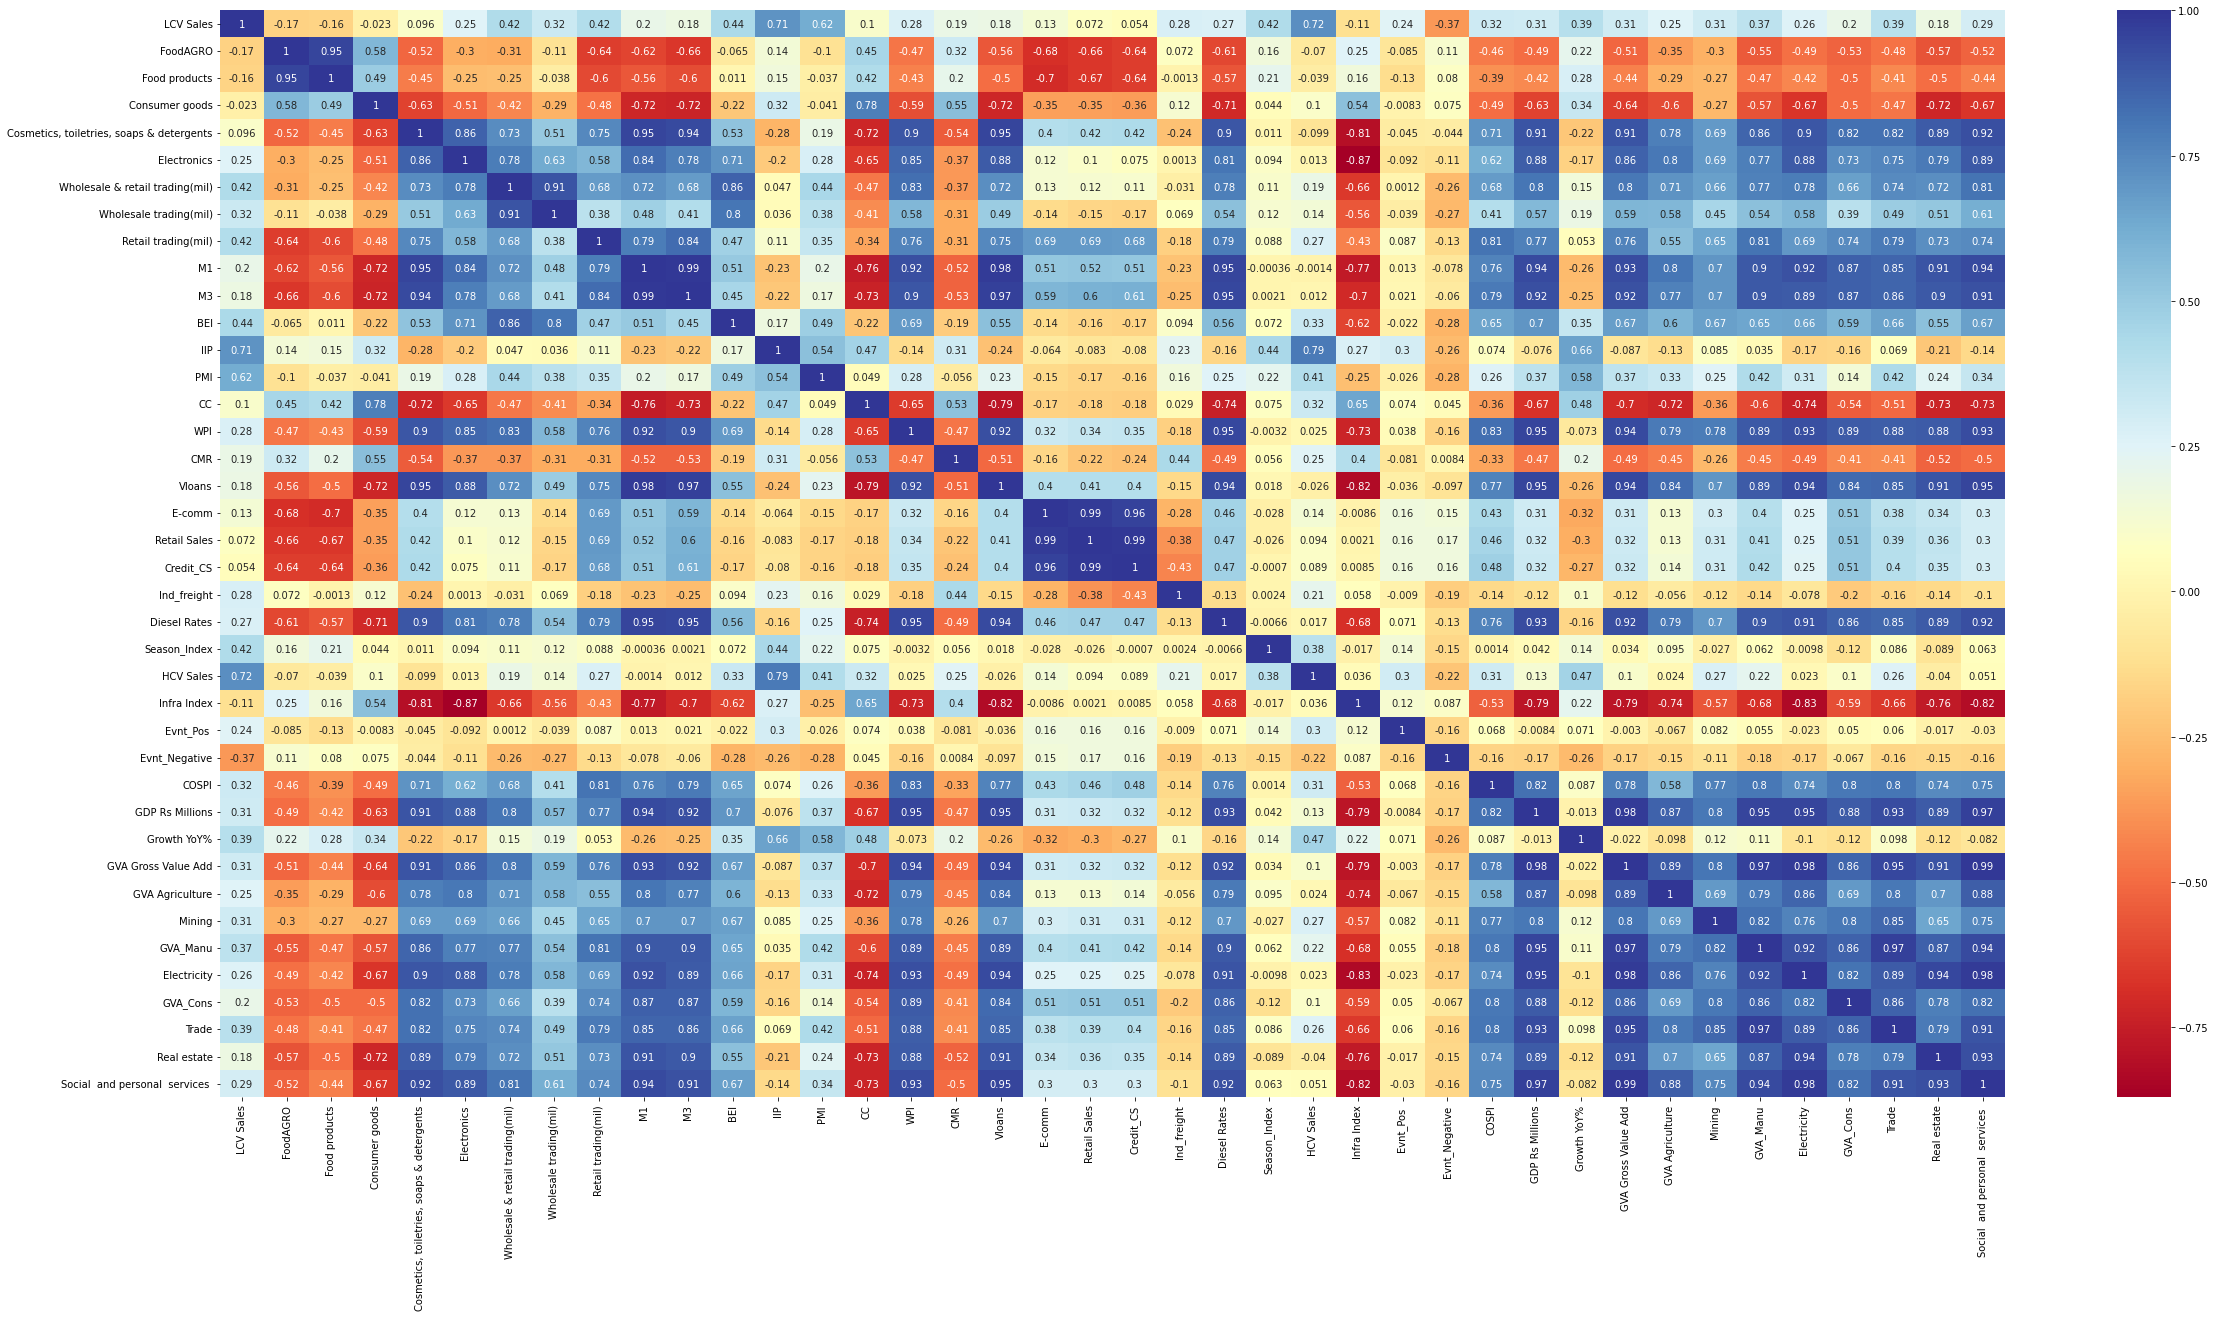

In [22]:
lcv_corr = lcv_ds.corr()
x,y = plt.subplots(figsize=(40,20))
sns.heatmap(lcv_corr,cmap='RdYlBu',yticklabels=lcv_corr.columns,annot=True)
plt.show()

In [23]:
lcv_ds.columns

Index(['LCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading(mil)', 'Wholesale trading(mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'HCV Sales', 'Infra Index', 'Evnt_Pos ',
       'Evnt_Negative', 'COSPI', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'GVA_Manu',
       'Electricity', 'GVA_Cons', 'Trade', 'Real estate',
       'Social  and personal  services '],
      dtype='object')

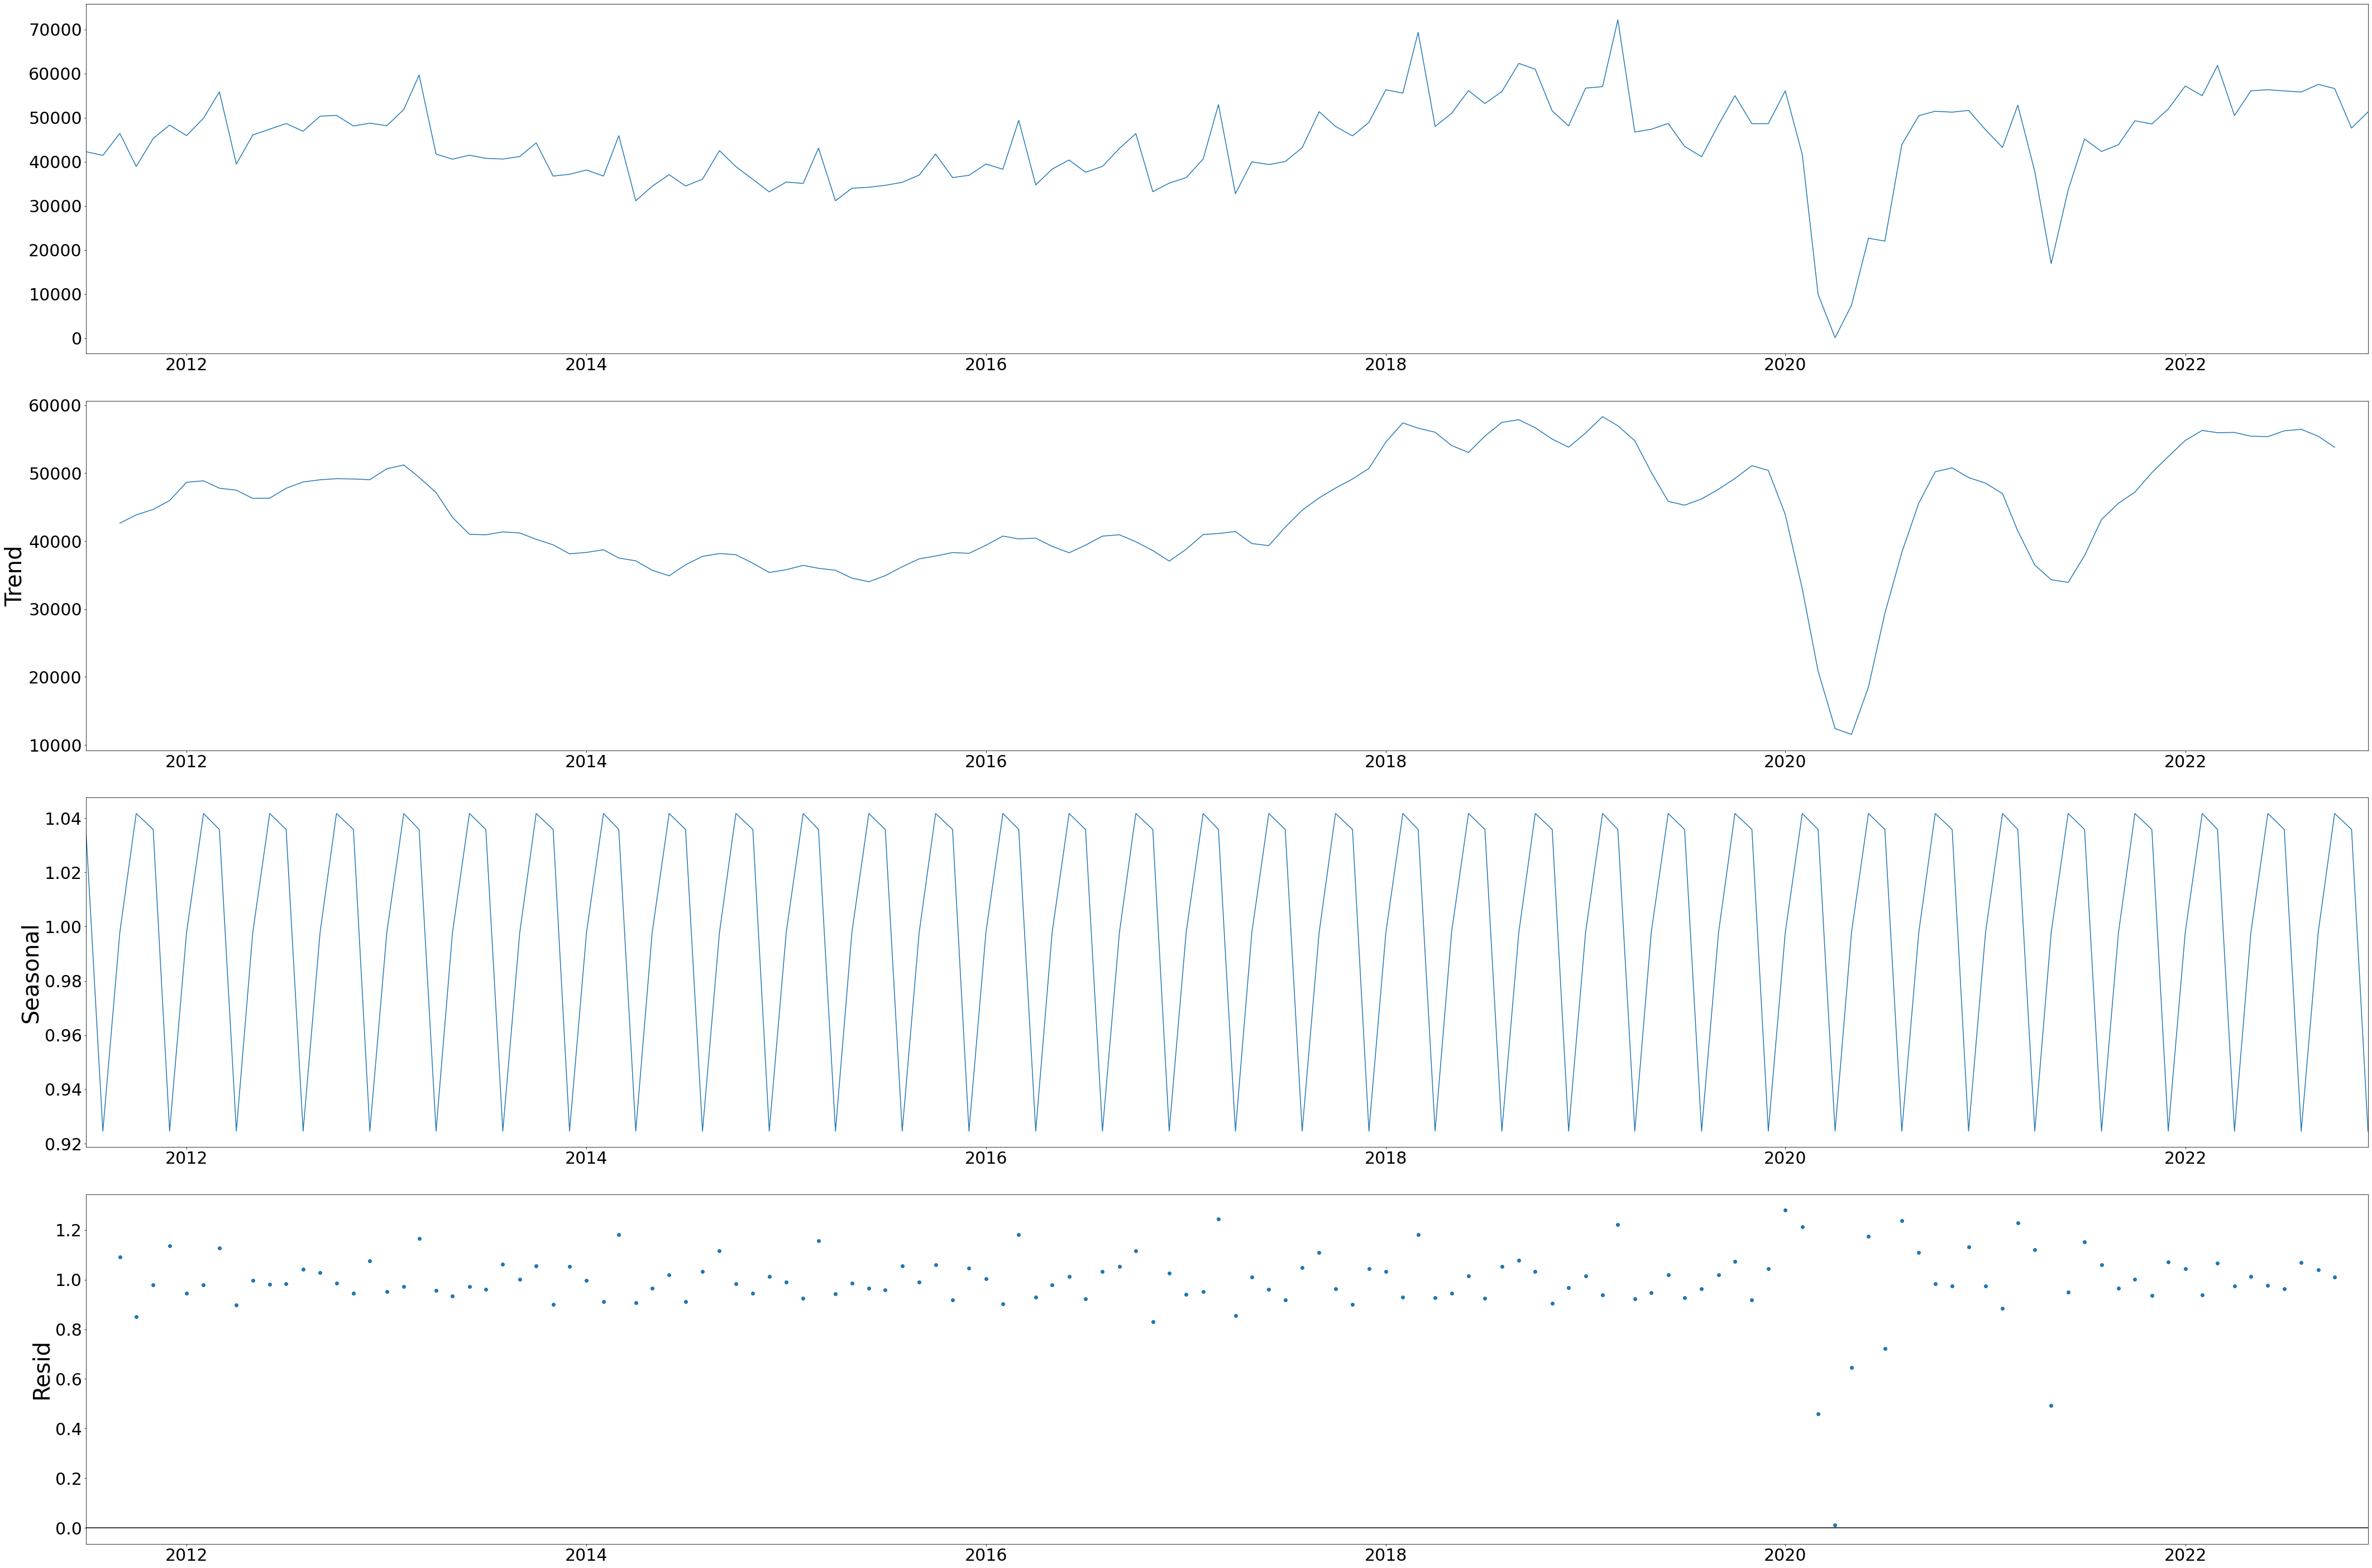

In [24]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
LCV_Sales = lcv_ds[['LCV Sales']]
result = seasonal_decompose(LCV_Sales, model='mulitplicative',period=4)
fig_size = plt.rcParams["figure.figsize"]
#plt.rcParams.update({'font.size': 22}
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.rc('font', size=40)
fig_size[0] = 60
fig_size[1] = 40
result.plot(seasonal=True)
pyplot.show()

In [25]:
import dtale
dtale.show(lcv_ds)

In [26]:
import sweetviz as sv

lcv_report = sv.analyze(lcv_ds)
lcv_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [27]:
import pandas as pd
from pandas_profiling import ProfileReport

2023-05-12 11:40:46,728 - INFO     - Pandas backend loaded 1.5.2
2023-05-12 11:40:46,737 - INFO     - Numpy backend loaded 1.21.5
2023-05-12 11:40:46,745 - INFO     - Pyspark backend loaded 3.3.1
2023-05-12 11:40:46,746 - INFO     - Python backend loaded


In [28]:
#LCV
LCV_report = ProfileReport(lcv_ds)
LCV_report.to_file(output_file ='LCV_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Train and Test Split

In [29]:
# LCV
lcv_ds.columns

Index(['LCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading(mil)', 'Wholesale trading(mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'HCV Sales', 'Infra Index', 'Evnt_Pos ',
       'Evnt_Negative', 'COSPI', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'GVA_Manu',
       'Electricity', 'GVA_Cons', 'Trade', 'Real estate',
       'Social  and personal  services '],
      dtype='object')

In [30]:
X = lcv_ds.drop('LCV Sales', axis = 1)
Y = lcv_ds[['LCV Sales']]

In [31]:
X.columns

Index(['FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading(mil)', 'Wholesale trading(mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'HCV Sales', 'Infra Index', 'Evnt_Pos ',
       'Evnt_Negative', 'COSPI', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'GVA_Manu',
       'Electricity', 'GVA_Cons', 'Trade', 'Real estate',
       'Social  and personal  services '],
      dtype='object')

In [32]:
Y.columns

Index(['LCV Sales'], dtype='object')

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
## This line instantiates the model. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1,shuffle=False)

In [37]:
rf = RandomForestRegressor(n_estimators=20) 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_train, y_train)

0.9524350545255887

In [38]:
rf.score(X_test, y_test)

0.5221346470623622

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

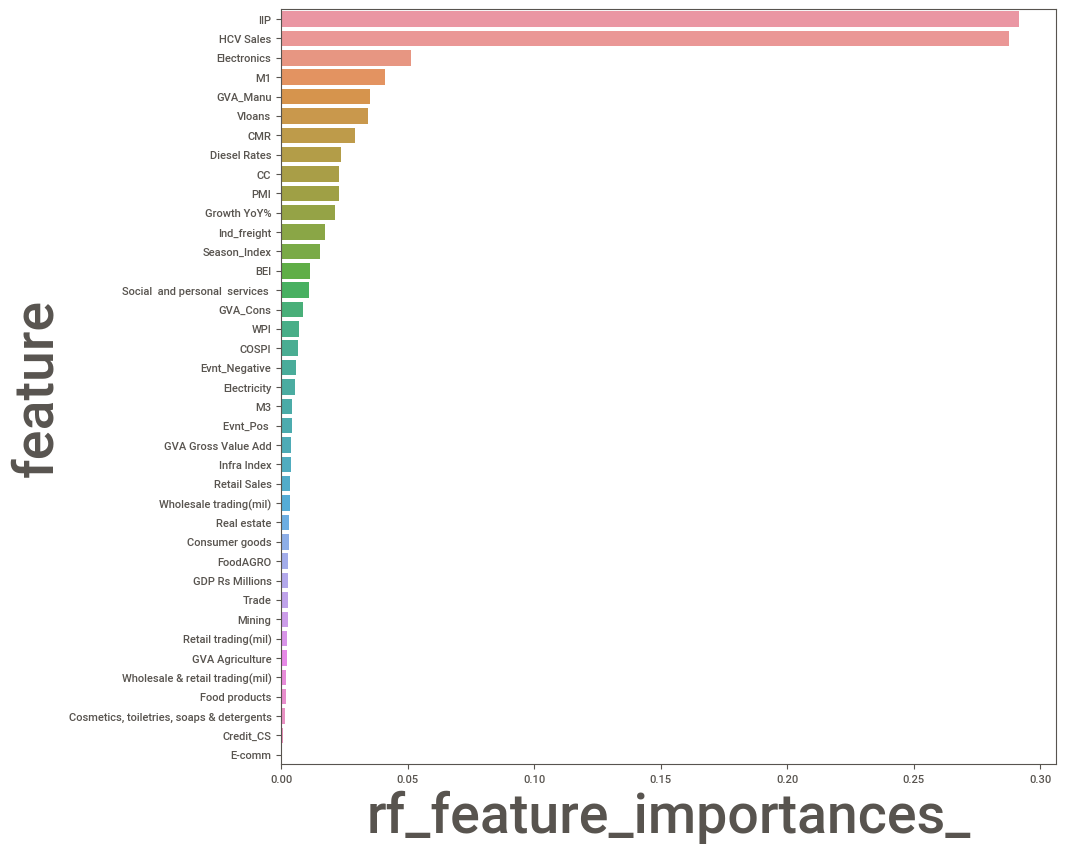

In [39]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':rf.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
#features_df.to_csv("HCV_RF2.csv")
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [40]:
param_test = {'max_depth':[3,5,7,8,9,10], 'min_samples_split':[2,3,4,5,6],
                'n_estimators':[100,200,400,600,800,1000], 'max_features': ['sqrt' , 'auto']}
gsearch = GridSearchCV(estimator = RandomForestRegressor(random_state=10),param_grid = param_test, scoring='r2',n_jobs=-1,cv=5)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 400, 600, 800, 1000]},
             scoring='r2')

In [41]:
mod1=RandomForestRegressor(min_samples_split =gsearch.best_params_['min_samples_split'],\
                          n_estimators = gsearch.best_params_['n_estimators'], max_depth = gsearch.best_params_['max_depth']\
                          ,max_features=gsearch.best_params_['max_features'] ,n_jobs = -1,random_state=10)\
                        .fit(X_train,y_train)

RandomForestRegressor()

RandomForestRegressor()

In [44]:
features_df.to_csv(r'C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Indicators/features_LCV.csv')

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

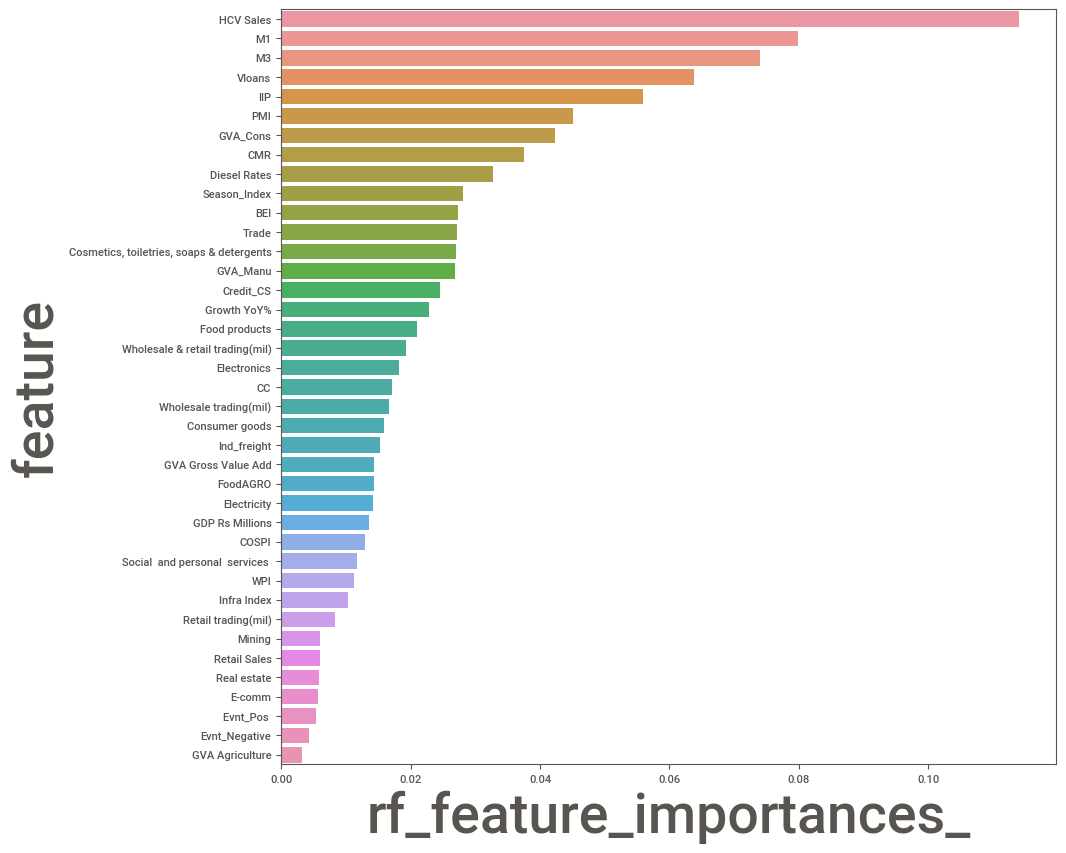

In [28]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':mod1.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [45]:
var1 = ['LCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading(mil)', 'Wholesale trading(mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'HCV Sales', 'Infra Index', 'Evnt_Pos ',
       'Evnt_Negative', 'COSPI', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'GVA_Manu',
       'Electricity', 'GVA_Cons', 'Trade', 'Real estate',
       'Social  and personal  services ']

In [46]:
var = ['LCV Sales','IIP','PMI',
       'CMR', 'Vloans','Retail Sales','Ind_freight','Evnt_Pos ','Evnt_Negative',
       'Season_Index', 'HCV Sales']

In [60]:
#lcv_ds['IIP_inv'] = 1/lcv_ds['IIP']

In [61]:
#lcv_ds['Ind_freight_log'] = np.log(lcv_ds['Ind_freight'])

In [62]:
#lcv_ds['Retail Sales_inv'] = 1/lcv_ds['Retail Sales']

In [47]:
lcv_before = lcv_ds[var1]

In [48]:
lcv_after = lcv_ds[var]

In [49]:
X1 = sm.tools.add_constant(lcv_before)
X2 = sm.tools.add_constant(lcv_after)

In [50]:
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after =  pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

In [51]:
print('DATA BEFORE')
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                        20179.800154
LCV Sales                                        8.893428
FoodAGRO                                        29.975156
Food products                                   29.317346
Consumer goods                                  10.786167
Cosmetics, toiletries, soaps & detergents       35.021222
Electronics                                     45.235305
Wholesale & retail trading(mil)                517.435654
Wholesale trading(mil)                         253.721920
Retail trading(mil)                             56.394297
M1                                             211.151487
M3                                            1085.431032
BEI                                             43.305645
IIP                                             10.294017
PMI                                              6.795892
CC                                              51.641206
WPI                                            210.289384
CMR           

In [52]:
print("DATA AFTER")
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_after)

DATA AFTER
----------------------------------------------------------------------------------------------------


const            1122.397891
LCV Sales           4.061525
IIP                 5.263855
PMI                 2.680643
CMR                 1.984734
Vloans              2.600967
Retail Sales        1.849258
Ind_freight         1.601513
Evnt_Pos            1.332895
Evnt_Negative       1.265017
Season_Index        1.370327
HCV Sales           3.406996
dtype: float64

In [53]:
X3 = lcv_after.drop('LCV Sales', axis = 1)
Y3 = lcv_after[['LCV Sales']]

In [54]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.20, random_state=1,shuffle=False)

In [55]:
X4 = sm.add_constant(X3)

# OLS model
ln_model = sm.OLS(Y3, X4)
lcv_model = ln_model.fit()

In [56]:
print(lcv_model.summary())

                            OLS Regression Results                            
Dep. Variable:              LCV Sales   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     38.88
Date:                Fri, 12 May 2023   Prob (F-statistic):           5.80e-34
Time:                        11:56:05   Log-Likelihood:                -1377.1
No. Observations:                 138   AIC:                             2776.
Df Residuals:                     127   BIC:                             2808.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.897e+04   1.43e+04     -4.839

In [95]:
lcv_for = pd.read_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast\LCV_Forecast_2023_2024.csv")

In [96]:
lcv_for = lcv_for.set_index('Date')

In [97]:
lcv_for.columns

Index(['Const', 'IIP_fitted', 'PMI_upper', 'CMR_upper', 'Vloans_upper',
       'Retail Sales_fitted', 'Ind_freight_fitted', 'Event_Pos',
       'Event_Negative', 'Season_Index', 'HCV Sales_fitted', 'Final Forecast'],
      dtype='object')

In [98]:
lcv_for.head()

,Const,IIP_fitted,PMI_upper,CMR_upper,Vloans_upper,Retail Sales_fitted,Ind_freight_fitted,Event_Pos,Event_Negative,Season_Index,HCV Sales_fitted,Final Forecast
Date,,,,,,,,,,,,
Jan-23,1,102.534841,59.549369,6.930889,4940.253385,925.486089,99.683189,0,0,0.998766,36141.10712,62149.8153
Feb-23,1,99.150965,57.921381,6.955634,4958.828045,930.551737,98.841046,0,0,1.000127,37283.32079,60458.8524
Mar-23,1,96.021586,55.968150,6.946301,5124.660050,935.478279,97.690755,0,0,1.202582,42853.84071,62408.6416
Apr-23,1,50.806218,47.313552,6.938849,5136.925627,940.269535,99.163995,0,0,0.796020,27324.36441,38162.4769
May-23,1,60.057481,48.518948,6.855177,5149.270347,944.929220,98.370359,0,0,0.870706,27979.93397,41613.1122


In [99]:
X4

,IIP,PMI,CMR,Vloans,Retail Sales,Ind_freight,Evnt_Pos,Evnt_Negative,Season_Index,HCV Sales
Date,,,,,,,,,,
2011-07-01,100.31,52.1,7.180400,768.5600,474.000000,109.317315,0,0,0.939089,29539
2011-08-01,100.31,52.8,7.228000,773.9600,474.000000,109.059972,0,0,0.982286,29559
2011-09-01,100.31,53.1,7.450455,772.1200,474.000000,108.807408,0,0,1.081221,33803
2011-10-01,100.31,52.8,7.704167,785.4000,474.000000,108.555673,0,0,1.096028,28685
2011-11-01,100.31,51.3,7.687391,802.3500,474.000000,108.296462,0,0,0.995700,28518
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,95.00,56.2,4.920000,4276.5399,920.277407,99.893089,0,0,1.009335,27281
2022-09-01,103.90,55.1,5.150000,4495.3086,920.277407,99.893089,0,0,1.114730,34549
2022-10-01,87.20,55.3,5.950000,4495.3086,920.277407,99.893089,0,0,1.139636,27908


In [100]:
frv = ['Const', 'IIP_fitted', 'PMI_upper', 'CMR_upper', 'Vloans_upper',
       'Retail Sales_fitted', 'Ind_freight_fitted', 'Event_Pos',
       'Event_Negative', 'Season_Index', 'HCV Sales_fitted']

In [101]:
ft_lcv = lcv_for[frv]

In [102]:
lcv_for.shape

(24, 12)

In [103]:
ft_lcv.shape

(24, 11)

In [104]:
ft_lcv

,Const,IIP_fitted,PMI_upper,CMR_upper,Vloans_upper,Retail Sales_fitted,Ind_freight_fitted,Event_Pos,Event_Negative,Season_Index,HCV Sales_fitted
Date,,,,,,,,,,,
Jan-23,1,102.534841,59.549369,6.930889,4940.253385,925.486089,99.683189,0,0,0.998766,36141.10712
Feb-23,1,99.150965,57.921381,6.955634,4958.828045,930.551737,98.841046,0,0,1.000127,37283.32079
Mar-23,1,96.021586,55.968150,6.946301,5124.660050,935.478279,97.690755,0,0,1.202582,42853.84071
Apr-23,1,50.806218,47.313552,6.938849,5136.925627,940.269535,99.163995,0,0,0.796020,27324.36441
May-23,1,60.057481,48.518948,6.855177,5149.270347,944.929220,98.370359,0,0,0.870706,27979.93397
Jun-23,1,80.604045,53.927032,6.861833,5271.211649,949.460947,102.804800,0,0,0.944056,29911.32939
Jul-23,1,84.862005,53.598589,6.851006,5280.880891,764.190154,101.023794,0,0,0.938752,30867.07632
Aug-23,1,85.999401,55.568875,6.876600,5291.531958,768.476410,100.918154,0,0,0.953332,31393.40205
Sep-23,1,95.316504,57.099749,6.873068,5427.626544,772.644963,100.822384,0,0,1.060360,34663.30700


In [105]:
lcv_f1 = lcv_model.predict(ft_lcv)

In [106]:
lcv_f1

Date
Jan-23    62149.815324
Feb-23    60458.852411
Mar-23    62408.641648
Apr-23    38162.476940
May-23    41613.112160
Jun-23    52302.406804
Jul-23    51825.616101
Aug-23    54133.955786
Sep-23    59535.276391
Oct-23    62074.981728
Nov-23    56478.729653
Dec-23    59896.887551
Jan-24    61880.871294
Feb-24    61688.300218
Mar-24    66343.031434
Apr-24    43788.470482
May-24    43658.786299
Jun-24    51125.039429
Jul-24    56498.039046
Aug-24    57045.770847
Sep-24    61986.325874
Oct-24    61923.069181
Nov-24    60200.937632
Dec-24    62667.782851
dtype: float64

<AxesSubplot: >

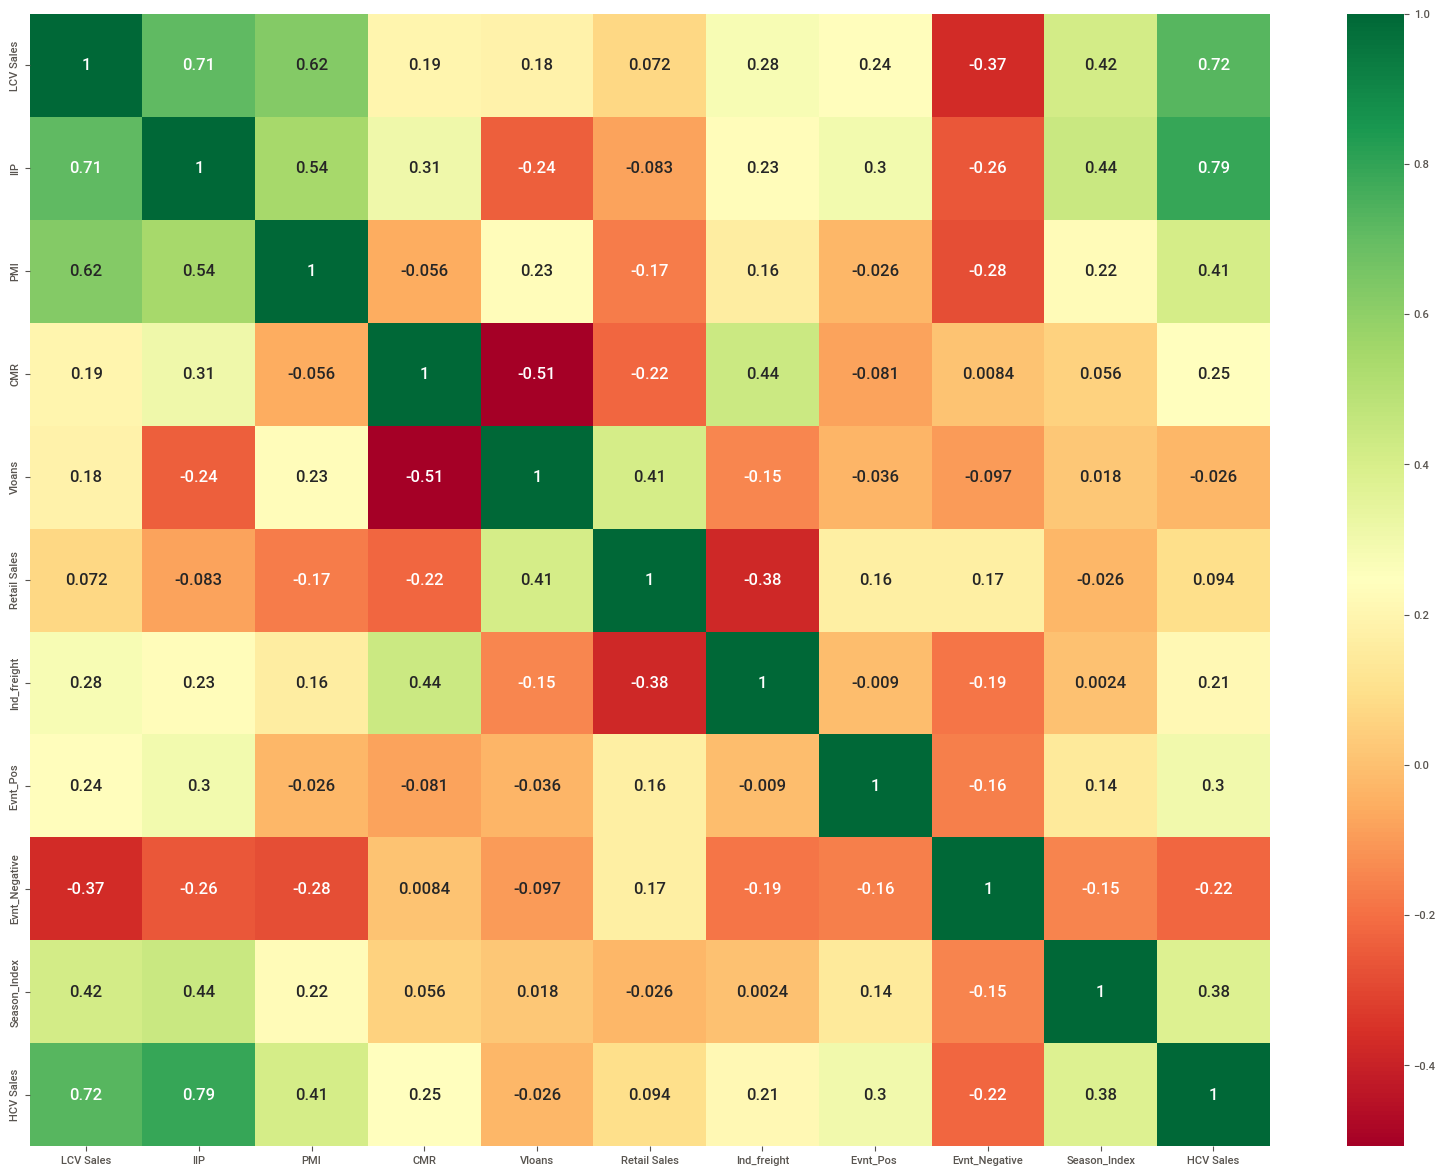

In [57]:
# calculate the correlation matrix
lcv1 = lcv_after.corr()
#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
# display the correlation matrix
#display(corr)
f, ax = plt.subplots(figsize=(20, 15))
# plot the correlation heatmap
sns.heatmap(lcv1, xticklabels=lcv1.columns, yticklabels=lcv1.columns, cmap='RdYlGn',annot= True,annot_kws={'fontsize':12})

<AxesSubplot: xlabel='IIP', ylabel='LCV Sales'>

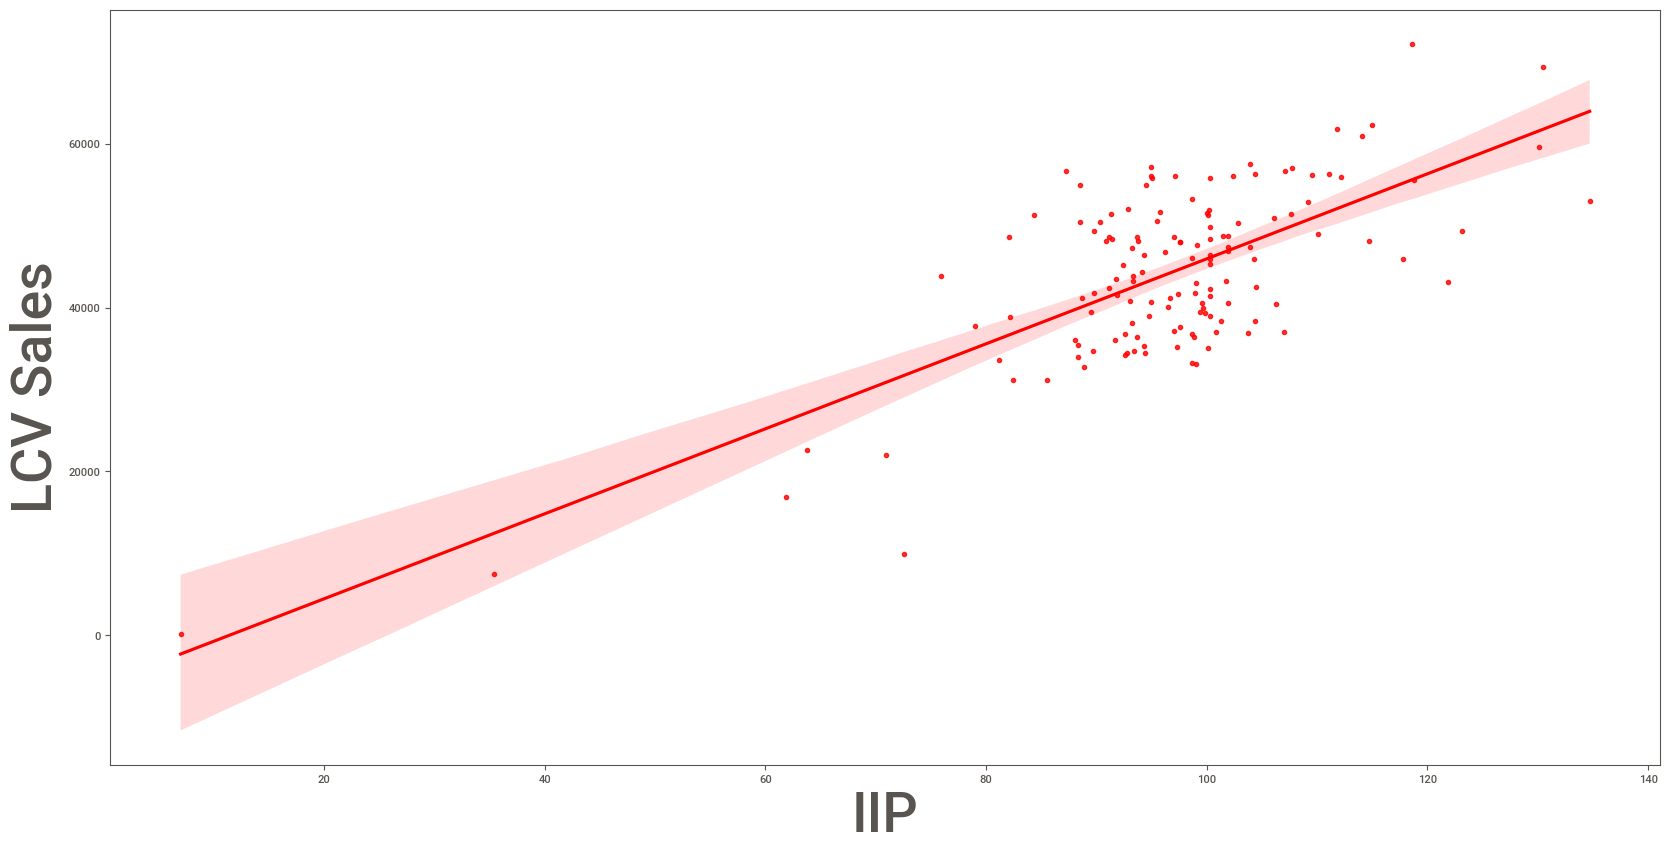

In [58]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="IIP", y = "LCV Sales", data = lcv_after, color= 'red')

<AxesSubplot: xlabel='PMI', ylabel='LCV Sales'>

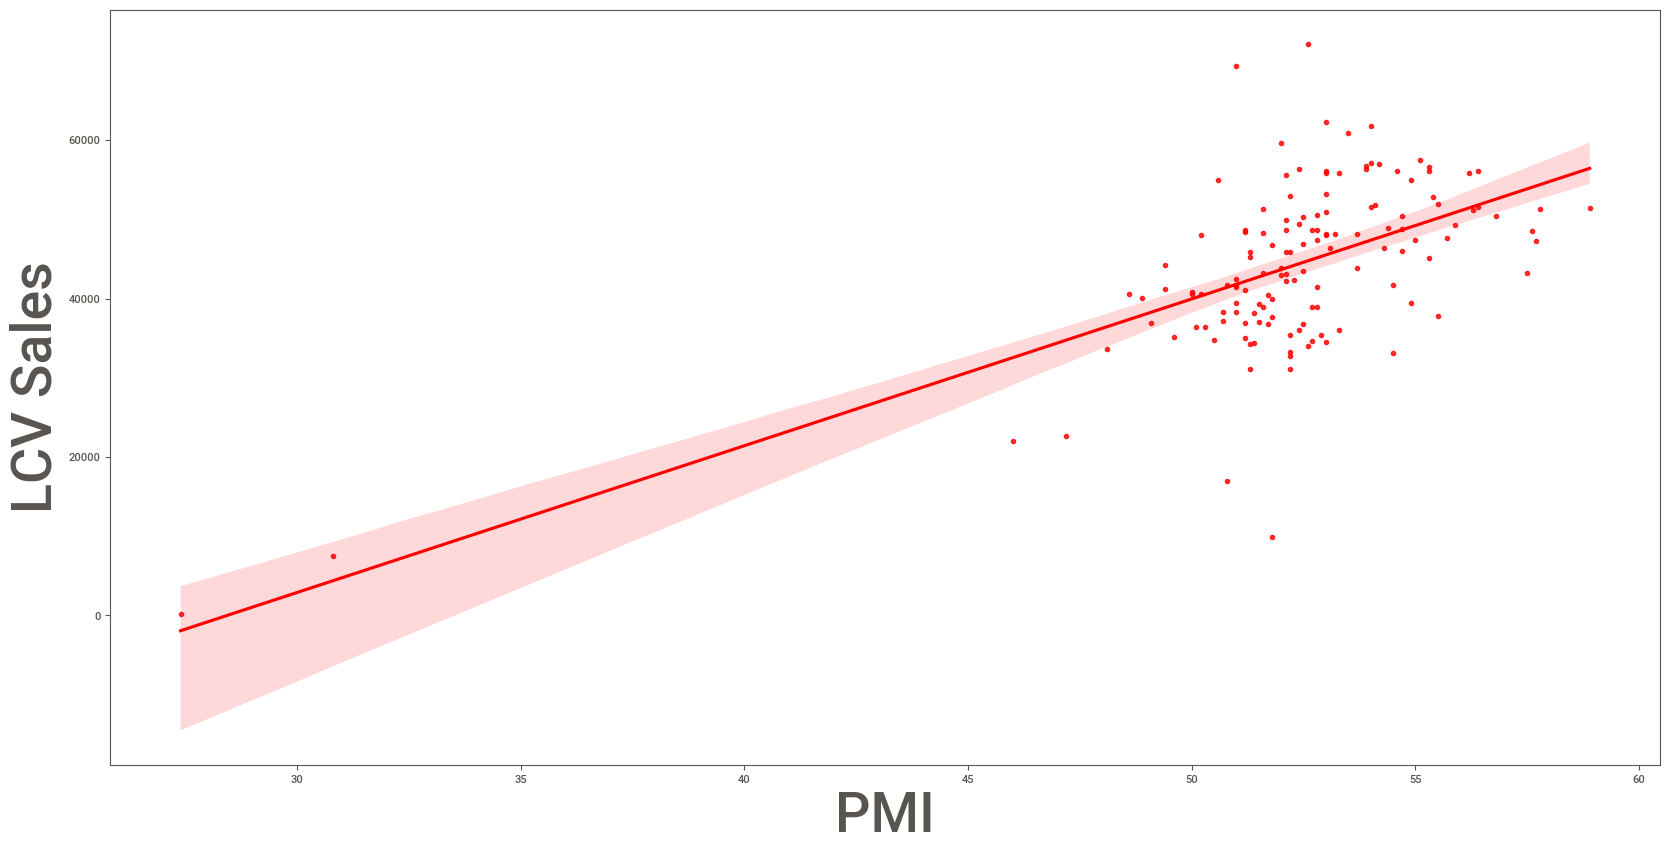

In [59]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="PMI", y = "LCV Sales", data = lcv_after, color= 'red')

<AxesSubplot: xlabel='CMR', ylabel='LCV Sales'>

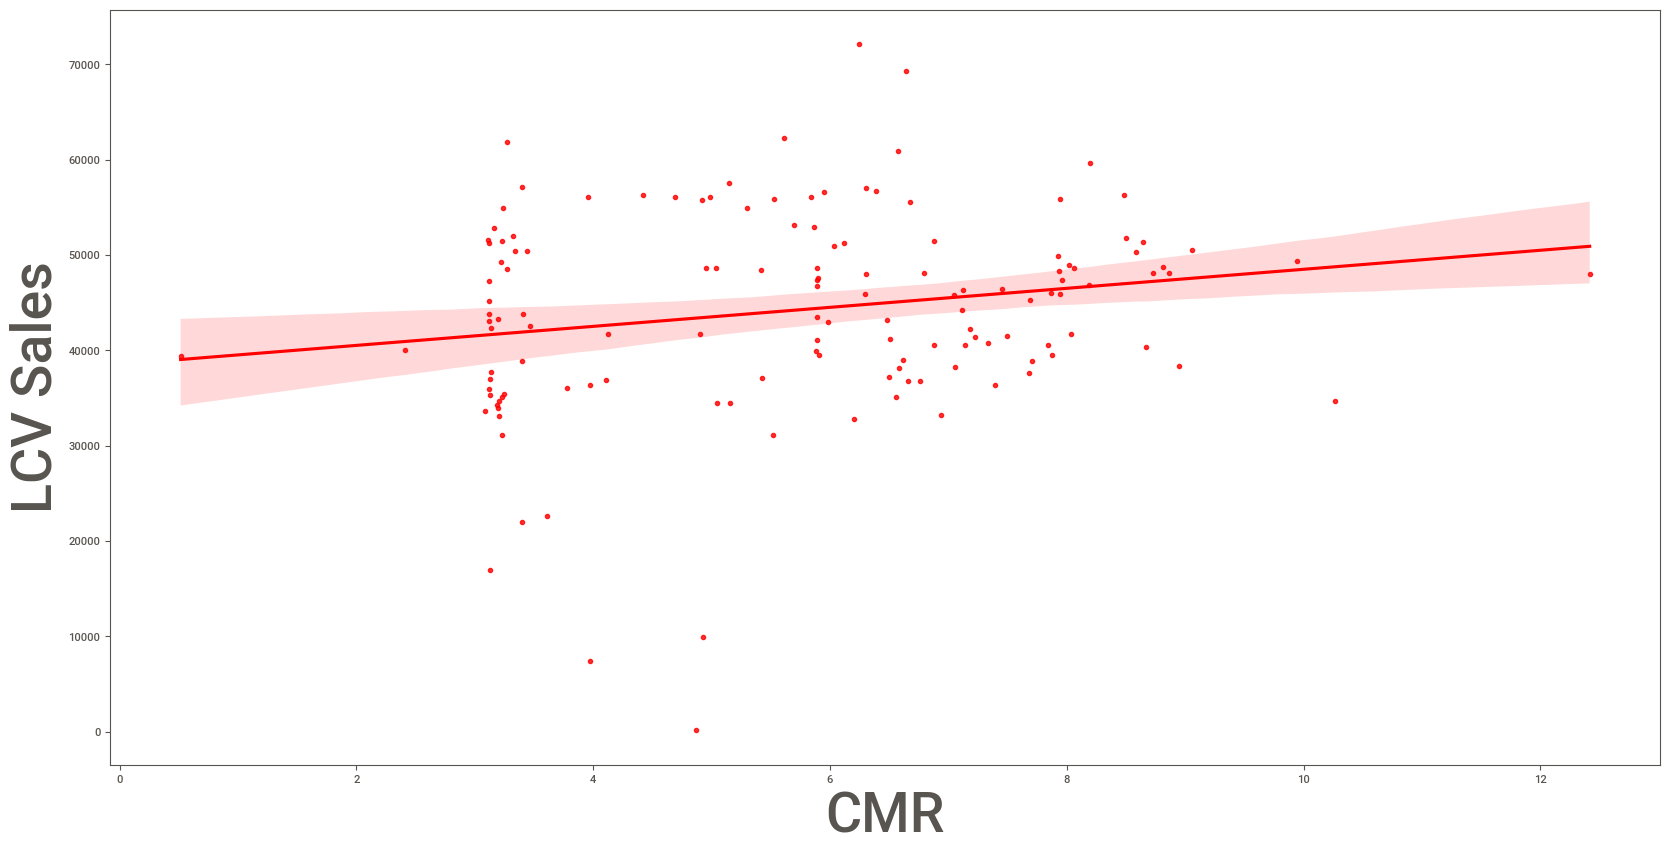

In [60]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="CMR", y = "LCV Sales", data = lcv_after, color= 'red')

<AxesSubplot: xlabel='Vloans', ylabel='LCV Sales'>

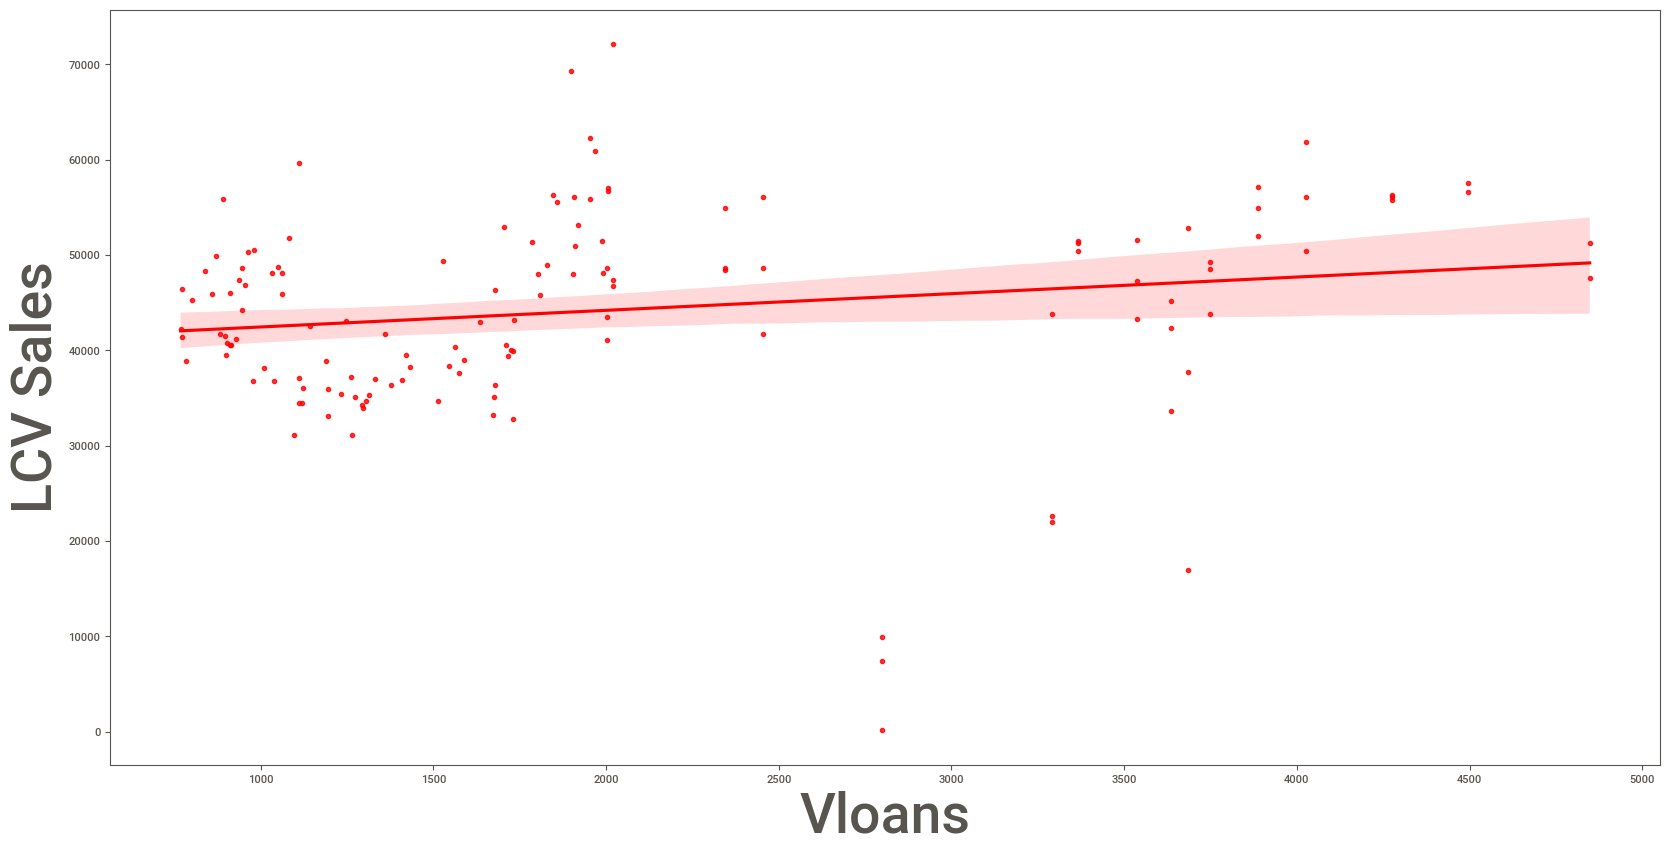

In [61]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="Vloans", y = "LCV Sales", data = lcv_after, color= 'red')

<AxesSubplot: xlabel='Retail Sales', ylabel='LCV Sales'>

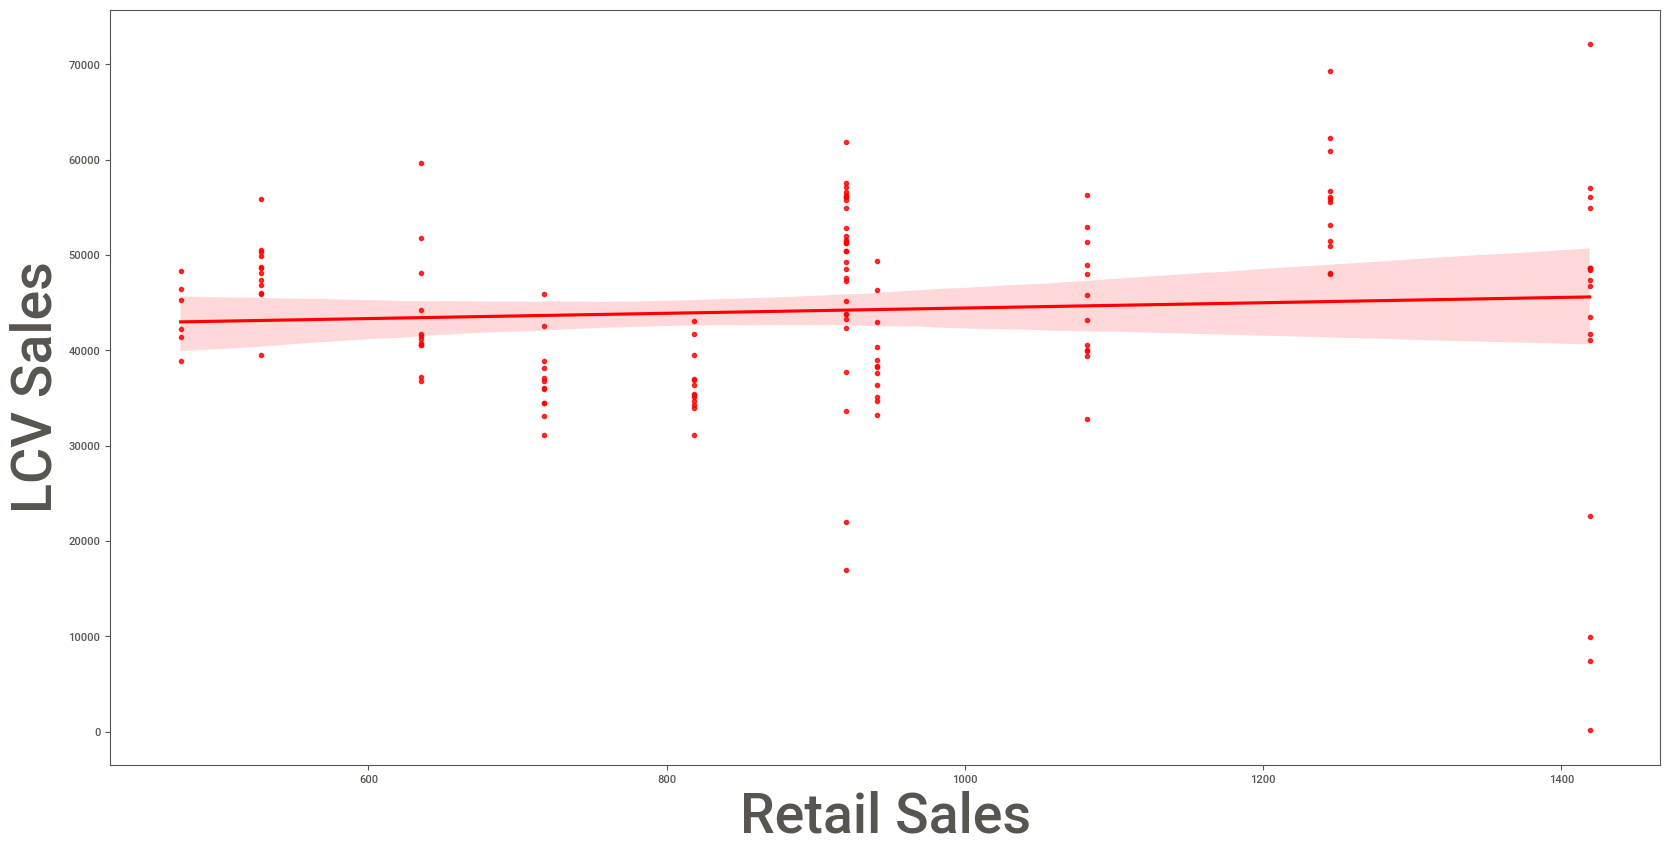

In [62]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="Retail Sales", y = "LCV Sales", data = lcv_after, color= 'red')

<AxesSubplot: xlabel='Ind_freight', ylabel='LCV Sales'>

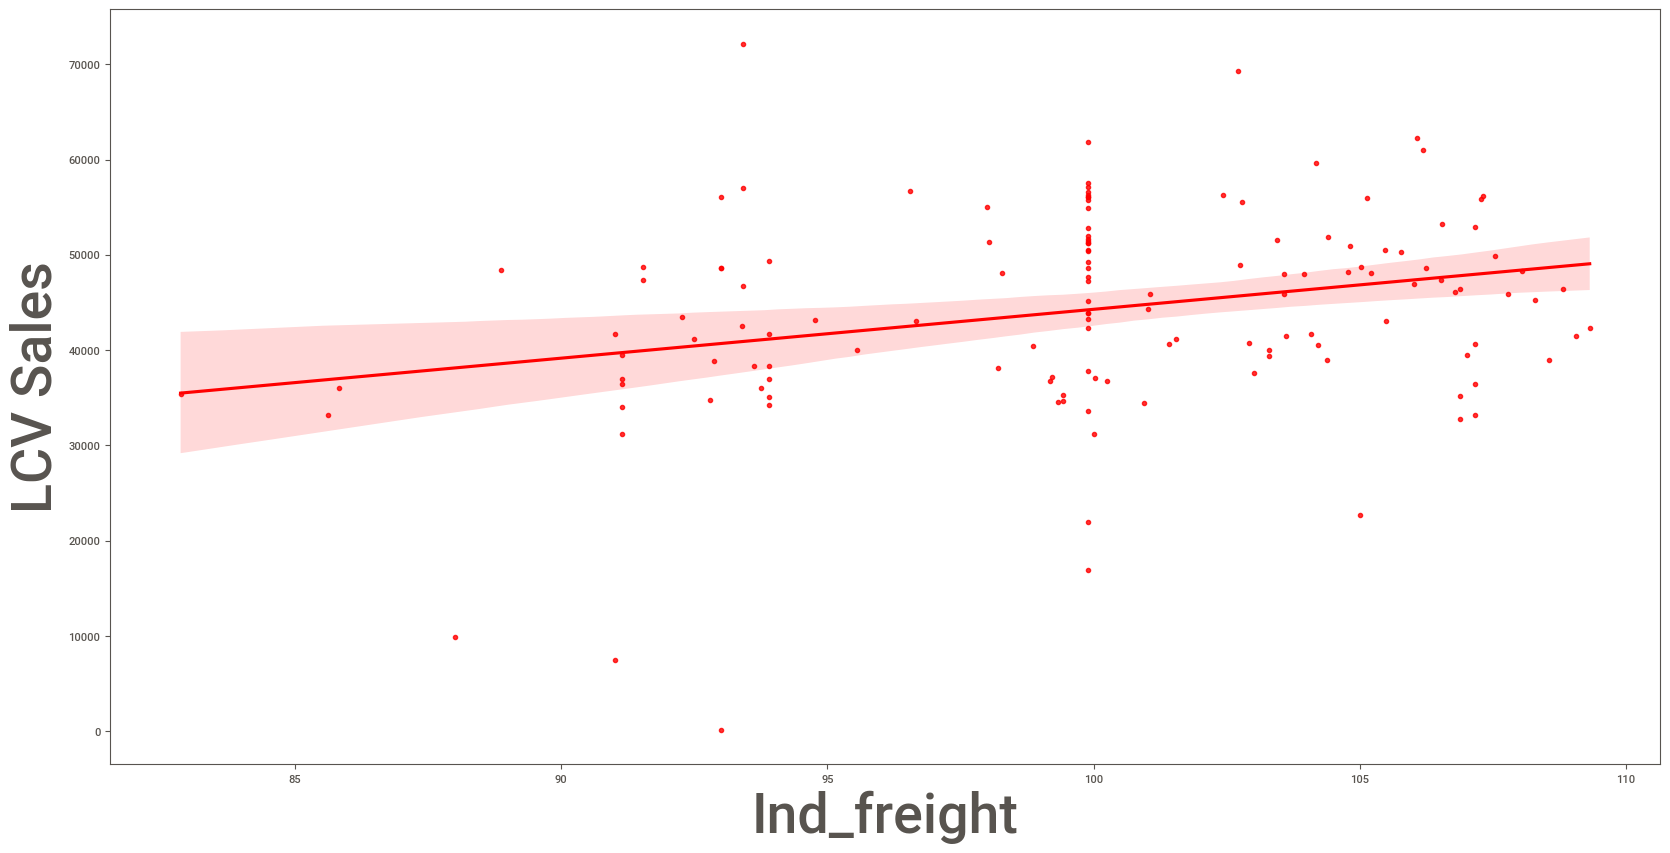

In [63]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="Ind_freight", y = "LCV Sales", data = lcv_after, color= 'red')

<AxesSubplot: xlabel='HCV Sales', ylabel='LCV Sales'>

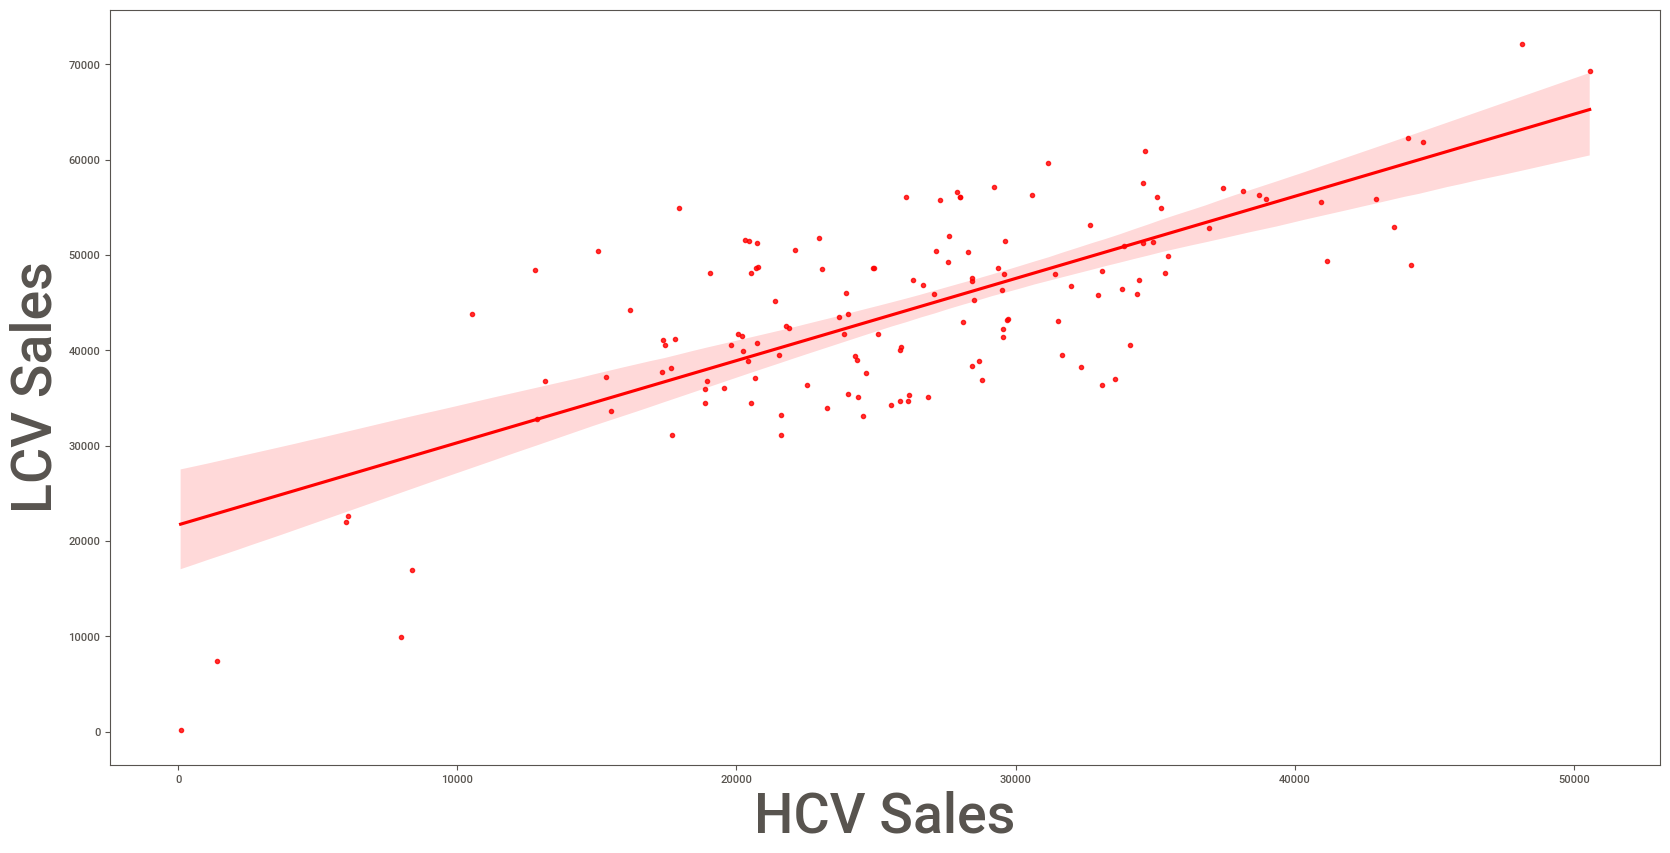

In [64]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="HCV Sales", y = "LCV Sales", data = lcv_after, color= 'red')

In [65]:
# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_predict = regression_model.predict(X_test)
predict = regression_model.predict(X_train)
# Show the first 12 predictions
train_mape = ((abs((y_train-predict)/y_train)).mean())*100
test_mape = ((abs((y_test-y_predict)/y_test)).mean())*100
print("Train Mape in % is ...", train_mape)
print("Test Mape in % is ...", test_mape)

Train Mape in % is ... LCV Sales    23.623585
dtype: float64
Test Mape in % is ... LCV Sales    16.895158
dtype: float64


In [67]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -7.289e+04
----------------------------------------------------------------------------------------------------
The Coefficient for FoodAGRO is 1.3e+02
The Coefficient for Food products is 8.8e+02
The Coefficient for Consumer goods is 9.2e+02
The Coefficient for Cosmetics, toiletries, soaps & detergents is -0.94
The Coefficient for Electronics is 9.4
The Coefficient for Wholesale & retail trading(mil) is 2.3e+02
The Coefficient for Wholesale trading(mil) is 3.2e+03
The Coefficient for Retail trading(mil) is -2.1e+03
The Coefficient for M1 is 1.4e+04
The Coefficient for M3 is 0.29


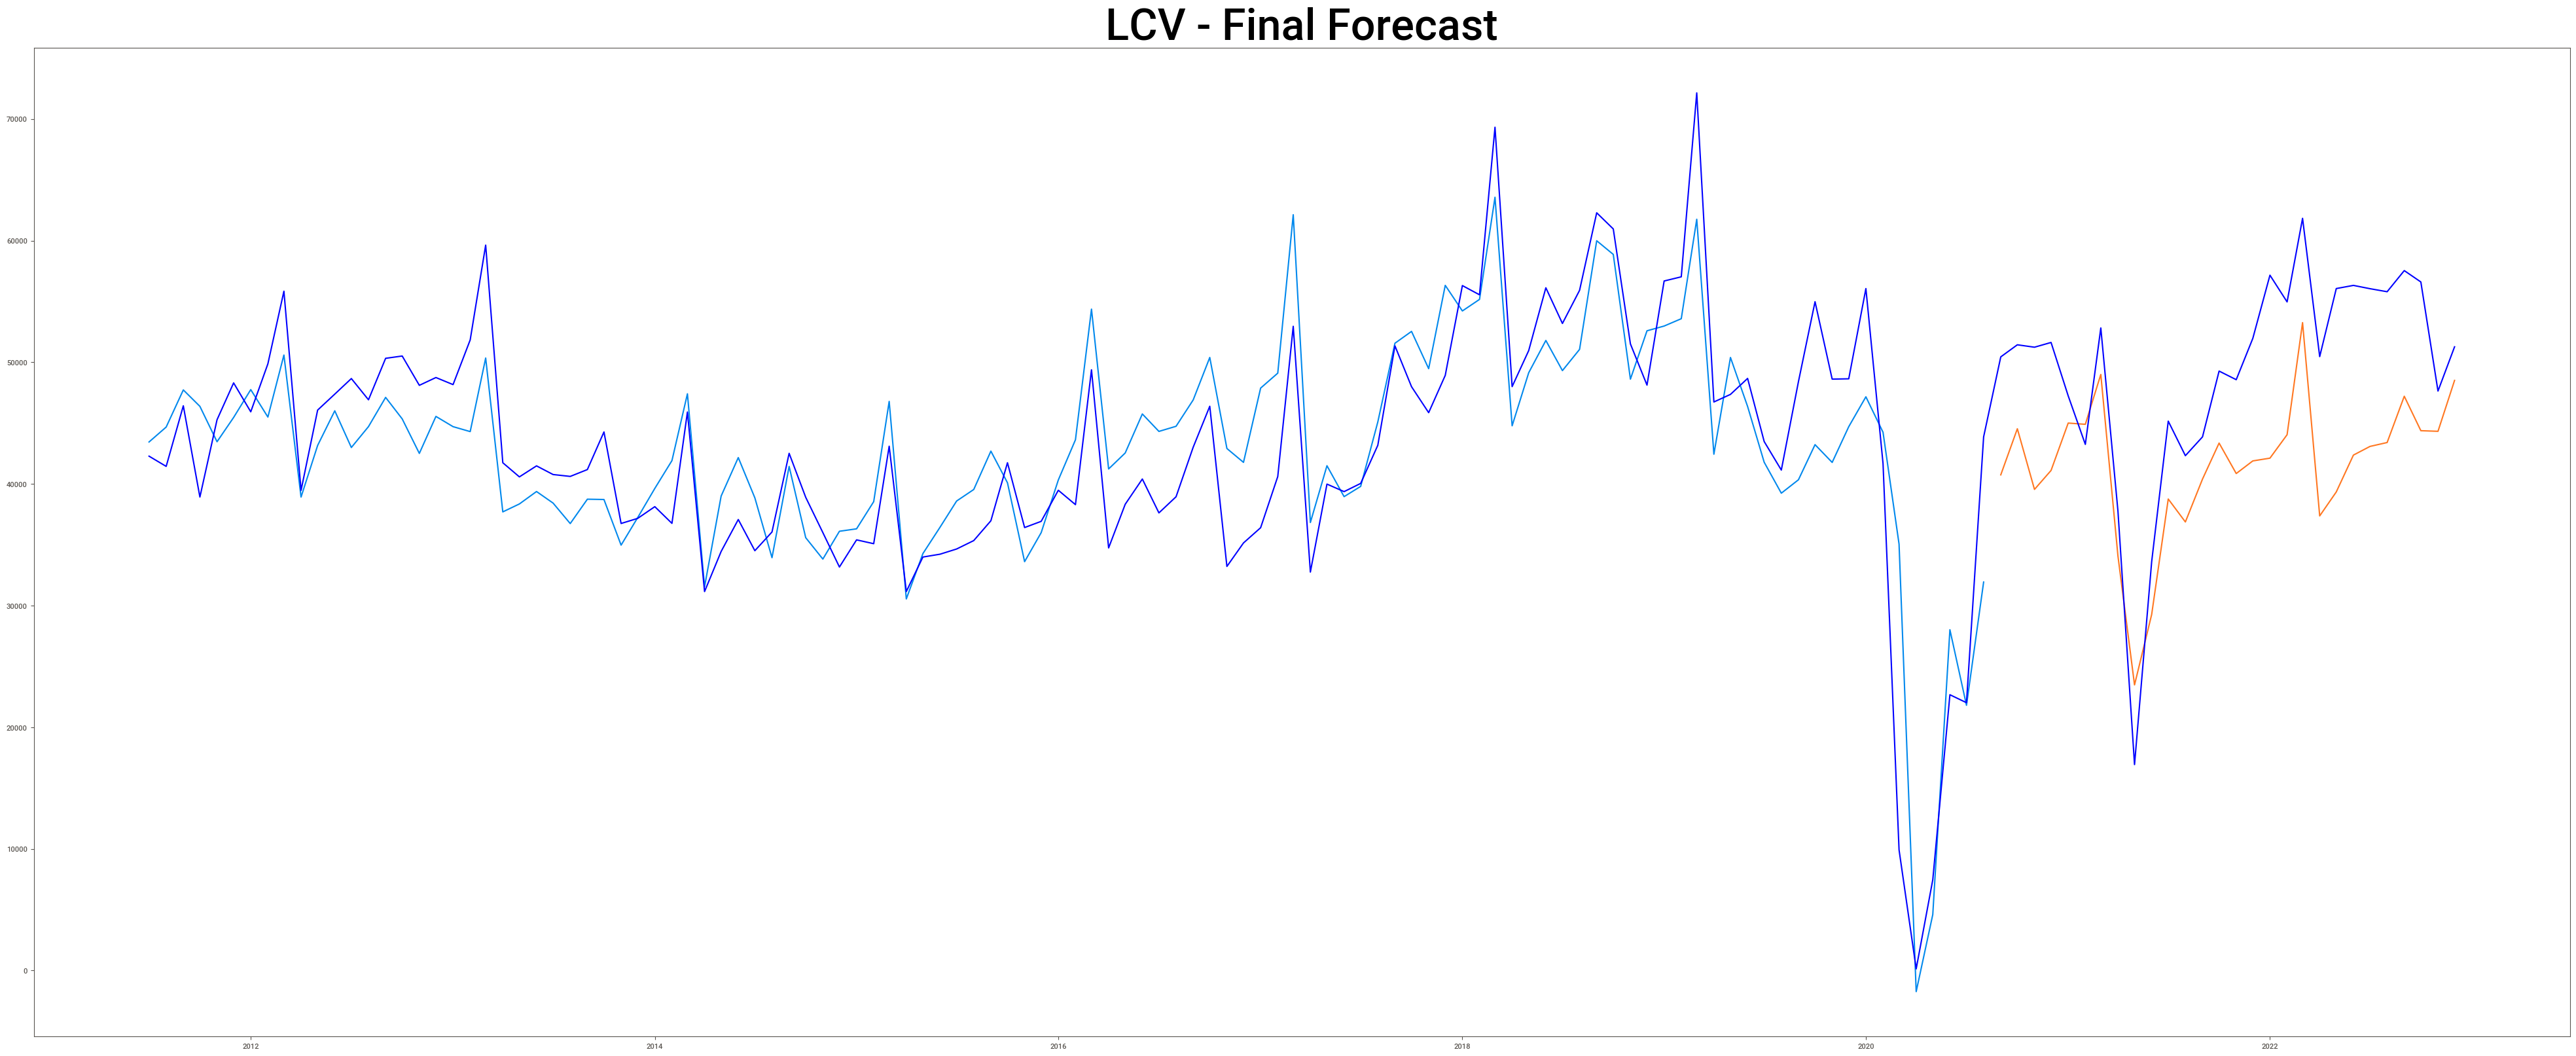

In [68]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.plot(X_train.index,predict)
plt.plot(X_test.index,y_predict)
plt.plot(X.index,Y,color = 'blue')
plt.title("LCV - Final Forecast")
plt.show()

In [69]:
from sklearn.preprocessing import MinMaxScaler
X4 = X3
scaler = MinMaxScaler()
print(scaler.fit(X4))
MinMaxScaler()
print(scaler.data_max_)
X5 = scaler.transform(X4)

MinMaxScaler()
[1.34700000e+02 5.89000000e+01 1.24175000e+01 4.84747250e+03
 1.41900000e+03 1.09317315e+02 1.00000000e+00 1.00000000e+00
 1.19866701e+00 5.05660000e+04]


In [70]:
from sklearn.preprocessing import MinMaxScaler
Y4 = Y3
scaler = MinMaxScaler()
print(scaler.fit(Y4))
MinMaxScaler()
print(scaler.data_max_)
Y5 = scaler.transform(Y4)

MinMaxScaler()
[72142.]


In [71]:
# Split X and y into X_
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X5_train, y5_train)

LinearRegression()

In [72]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X3.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.1869
----------------------------------------------------------------------------------------------------
The Coefficient for IIP is 0.35
The Coefficient for PMI is 0.34
The Coefficient for CMR is 0.14
The Coefficient for Vloans is 0.13
The Coefficient for Retail Sales is 0.049
The Coefficient for Ind_freight is 0.052
The Coefficient for Evnt_Pos  is 0.037
The Coefficient for Evnt_Negative is -0.048
The Coefficient for Season_Index is 0.043
The Coefficient for HCV Sales is 0.23
